# Análisis de datos de la pandemia de covid-19 en la Ciudad de México

En este proyecto, presento algunos análisis y visualizaciones de datos sobre la pandemia de Covid-19 en la Ciudad de México. Me concentro únicamente (por facilidad) en datos sobre personas con una prueba de laboratorio positiva (no antígeno).

La base de datos es la de la Secretaría de Salud y puede ser consultada en su portal. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import covid_data # Código propio para cargar y leer la base de datos de la SSA

In [3]:
pd.options.display.max_columns = 50

In [4]:
fecha = "210907"
covid_data.descarga_base_covid(fecha)

La base de datos se encuentra en la carpeta


In [5]:
datos = covid_data.lee_base_covid(fecha)

C:\Users\berto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


La base de datos tardó en cargarse 34.85190963745117 segundos


In [6]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-09-07,z482b8,2,12,9,2,9,9,12,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,1,99,México,97,97
1,2021-09-07,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,México,97,1
2,2021-09-07,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2,97,2,97,6,99,México,97,97
3,2021-09-07,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,9999-99-99,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
4,2021-09-07,zz8e77,2,12,9,2,9,9,2,1,2020-04-16,2020-04-10,9999-99-99,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97


In [7]:
datos.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

Selecciono solo algunas columnas del conjunto de datos para estudiarlas. Entre estas columnas, selecciono las asociadas a fechas y de comorbilidades.

In [7]:
datos_covid = datos[datos['ENTIDAD_RES']==9] # Ciudad de México

columnas = ['MUNICIPIO_RES', 'SEXO', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'EMBARAZO','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', "CLASIFICACION_FINAL"]

datos_covid = datos_covid[columnas]
datos_covid = datos_covid[datos_covid['CLASIFICACION_FINAL']==3] # Casos positivos (véase el catálogo de clasificación final)

In [8]:
datos_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765603 entries, 15 to 10015399
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   MUNICIPIO_RES        765603 non-null  int64 
 1   SEXO                 765603 non-null  int64 
 2   TIPO_PACIENTE        765603 non-null  int64 
 3   FECHA_INGRESO        765603 non-null  object
 4   FECHA_SINTOMAS       765603 non-null  object
 5   FECHA_DEF            765603 non-null  object
 6   INTUBADO             765603 non-null  int64 
 7   NEUMONIA             765603 non-null  int64 
 8   EDAD                 765603 non-null  int64 
 9   EMBARAZO             765603 non-null  int64 
 10  DIABETES             765603 non-null  int64 
 11  EPOC                 765603 non-null  int64 
 12  ASMA                 765603 non-null  int64 
 13  INMUSUPR             765603 non-null  int64 
 14  HIPERTENSION         765603 non-null  int64 
 15  OTRA_COM             765603 non

## Limpieza de datos

Primero realizaré limpieza de datos. Convertiré algunas columnas a tipos más sencillos con los que trabajar y añadiré unas cuantas columnas extras que serán de utilidad.

In [9]:
datos_covid["FECHA_INGRESO"] = pd.to_datetime(datos_covid["FECHA_INGRESO"])
datos_covid["FECHA_SINTOMAS"] = pd.to_datetime(datos_covid["FECHA_SINTOMAS"])

La columna "FECHA_DEF" tiene entradas nulas que están escritas en el formato "9999-99-99". Convertiré estas entradas a unas que la función pd.to_datetime entienda y cuando no las necesite en análisis posteriores, simplemente omitiré estas entradas.

In [10]:
def fecha_nula(fecha):
    """
    Una función para checar fechas nulas en la columna de fecha de defunción
    """
    if fecha == "9999-99-99":
        fecha = "1999-01-01"
    return fecha

In [11]:
def defuncion(fecha):
    if fecha == "9999-99-99":
        d = 0
    else:
        d = 1
    return d

In [12]:
datos_covid["DEF"] = datos_covid["FECHA_DEF"].apply(defuncion)

In [13]:
datos_covid["FECHA_DEF"] = datos_covid["FECHA_DEF"].apply(fecha_nula)

In [14]:
datos_covid["FECHA_DEF"] = pd.to_datetime(datos_covid["FECHA_DEF"])

In [15]:
datos_covid["SINTOMAS_INGRESO"] = datos_covid.FECHA_INGRESO - datos_covid.FECHA_SINTOMAS
datos_covid["SINTOMAS_DEF"] = datos_covid.FECHA_DEF - datos_covid.FECHA_SINTOMAS
datos_covid["INGRESO_DEF"] = datos_covid.FECHA_DEF - datos_covid.FECHA_INGRESO

In [16]:
datos_covid.reset_index(inplace=True, drop=True)

In [17]:
datos_covid.head()

,MUNICIPIO_RES,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,DEF,SINTOMAS_INGRESO,SINTOMAS_DEF,INGRESO_DEF
0,6,1,1,2020-09-08,2020-09-03,1999-01-01,97,2,26,2,2,2,2,2,2,2,2,2,2,2,3,0,5 days,-7916 days,-7921 days
1,5,1,1,2020-04-22,2020-04-20,1999-01-01,97,2,45,2,2,2,2,2,2,2,2,1,2,2,3,0,2 days,-7780 days,-7782 days
2,12,1,1,2020-12-21,2020-12-18,1999-01-01,97,2,62,2,2,2,2,2,1,2,2,1,2,2,3,0,3 days,-8022 days,-8025 days
3,4,1,1,2020-09-23,2020-09-23,1999-01-01,97,2,67,2,1,2,2,2,2,2,2,2,2,2,3,0,0 days,-7936 days,-7936 days
4,3,1,1,2020-03-04,2020-03-03,1999-01-01,97,2,29,2,2,2,2,2,2,2,2,2,2,2,3,0,1 days,-7732 days,-7733 days


In [18]:
def si_no(x):
    """
    Función que modifica las columnas que corresponden a una descripción "SI_NO" 
    del catálogo de la SSA (consultar catálogo y descriptores)
    """
    if x <= 2:
        x = np.abs(x-2)
    return x

In [19]:
columnas_si_no = ['INTUBADO', 'NEUMONIA', 'EMBARAZO','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
for columna in columnas_si_no:
    datos_covid[columna] = datos_covid[columna].apply(si_no)

In [20]:
datos_covid["CLASIFICACION_FINAL"] = datos_covid["CLASIFICACION_FINAL"] - 2

In [21]:
datos_covid.head()

,MUNICIPIO_RES,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,DEF,SINTOMAS_INGRESO,SINTOMAS_DEF,INGRESO_DEF
0,6,1,1,2020-09-08,2020-09-03,1999-01-01,97,0,26,0,0,0,0,0,0,0,0,0,0,0,1,0,5 days,-7916 days,-7921 days
1,5,1,1,2020-04-22,2020-04-20,1999-01-01,97,0,45,0,0,0,0,0,0,0,0,1,0,0,1,0,2 days,-7780 days,-7782 days
2,12,1,1,2020-12-21,2020-12-18,1999-01-01,97,0,62,0,0,0,0,0,1,0,0,1,0,0,1,0,3 days,-8022 days,-8025 days
3,4,1,1,2020-09-23,2020-09-23,1999-01-01,97,0,67,0,1,0,0,0,0,0,0,0,0,0,1,0,0 days,-7936 days,-7936 days
4,3,1,1,2020-03-04,2020-03-03,1999-01-01,97,0,29,0,0,0,0,0,0,0,0,0,0,0,1,0,1 days,-7732 days,-7733 days


## Análisis

Primero, estudiaré como se distribuyen los valores de las comorbilidades, de los embarazos y de las personas que fueron intubados o que desarrollaron neumonía

In [22]:
for columna in columnas_si_no:
    print(f"\n{columna}")
    print(datos_covid[columna].value_counts())
    
# 97 = No aplica
# 98 = Se ignora
# 99 = No especificado


INTUBADO
97    698977
0      55633
1      10938
99        55
Name: INTUBADO, dtype: int64

NEUMONIA
0    708731
1     56872
Name: NEUMONIA, dtype: int64

EMBARAZO
0     388058
97    371117
98      3366
1       3062
Name: EMBARAZO, dtype: int64

DIABETES
0     693393
1      70147
98      2063
Name: DIABETES, dtype: int64

EPOC
0     758563
1       5167
98      1873
Name: EPOC, dtype: int64

ASMA
0     749072
1      14670
98      1861
Name: ASMA, dtype: int64

INMUSUPR
0     759380
1       4376
98      1847
Name: INMUSUPR, dtype: int64

HIPERTENSION
0     674488
1      89194
98      1921
Name: HIPERTENSION, dtype: int64

OTRA_COM
0     755024
1       8643
98      1936
Name: OTRA_COM, dtype: int64

CARDIOVASCULAR
0     755488
1       8302
98      1813
Name: CARDIOVASCULAR, dtype: int64

OBESIDAD
0     685213
1      78572
98      1818
Name: OBESIDAD, dtype: int64

RENAL_CRONICA
0     757724
1       6035
98      1844
Name: RENAL_CRONICA, dtype: int64

TABAQUISMO
0     692470
1      71240
9

In [23]:
datos_covid["SEXO"].value_counts()
# 1 = Masculino
# 2 = Femenino

1    394486
2    371117
Name: SEXO, dtype: int64

In [25]:
datos_covid["DEF"].value_counts()

0    734038
1     31565
Name: DEF, dtype: int64

También estoy interesado en estudiar el número de casos nuevos diarios

In [26]:
casos_nuevos_diarios = datos_covid.groupby("FECHA_INGRESO")["CLASIFICACION_FINAL"].agg("sum").to_frame()
casos_nuevos_diarios.reset_index(inplace=True)
casos_nuevos_diarios.head()

,FECHA_INGRESO,CLASIFICACION_FINAL
0,2020-02-27,2
1,2020-03-04,1
2,2020-03-05,1
3,2020-03-07,1
4,2020-03-08,1


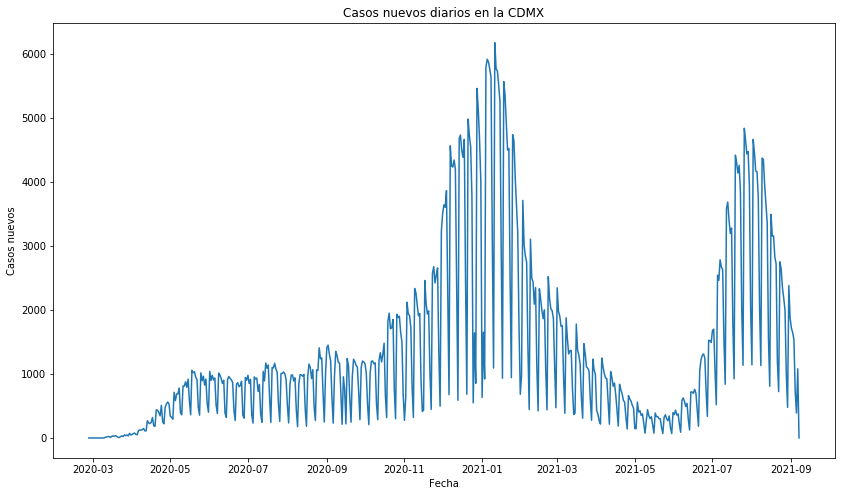

In [27]:
plt.figure(figsize=(14,8))
sns.lineplot(data=casos_nuevos_diarios, x = "FECHA_INGRESO", y="CLASIFICACION_FINAL")
plt.xlabel("Fecha")
plt.ylabel("Casos nuevos")
plt.title("Casos nuevos diarios en la CDMX")
plt.show()

La gráfica anterior parece mostrar que hay una tendencia a la baja en los contagios nuevos.

In [28]:
casos_nuevos_diarios["CASOS_ACUMULADOS"] = casos_nuevos_diarios["CLASIFICACION_FINAL"].cumsum(axis=0)

In [29]:
casos_nuevos_diarios.head()

,FECHA_INGRESO,CLASIFICACION_FINAL,CASOS_ACUMULADOS
0,2020-02-27,2,2
1,2020-03-04,1,3
2,2020-03-05,1,4
3,2020-03-07,1,5
4,2020-03-08,1,6


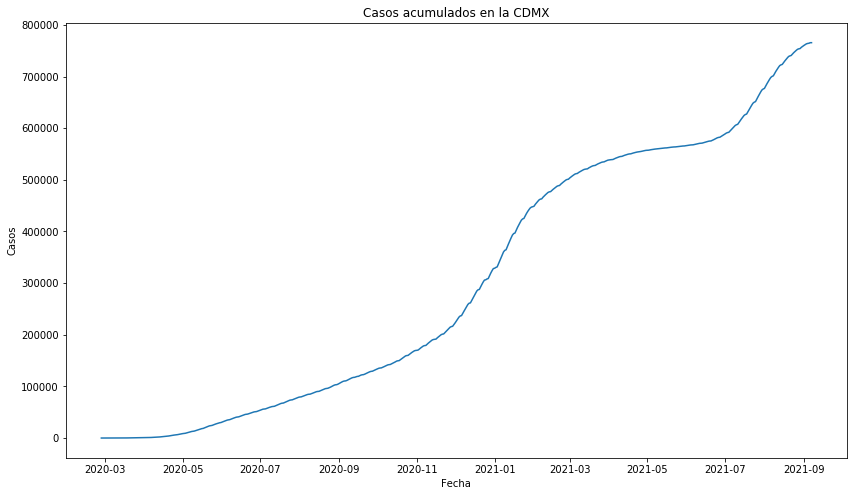

In [30]:
plt.figure(figsize=(14,8))
sns.lineplot(data=casos_nuevos_diarios, x = "FECHA_INGRESO", y="CASOS_ACUMULADOS")
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.title("Casos acumulados en la CDMX")
plt.show()

Ahora me interesa estudiar las curvas de defunciones

In [31]:
defunciones_diarias = datos_covid[datos_covid["DEF"]==1].groupby("FECHA_DEF")["DEF"].agg("sum").to_frame()
defunciones_diarias.reset_index(inplace=True)
defunciones_diarias.head()

,FECHA_DEF,DEF
0,2020-03-22,1
1,2020-03-23,1
2,2020-03-25,1
3,2020-03-26,3
4,2020-03-27,4


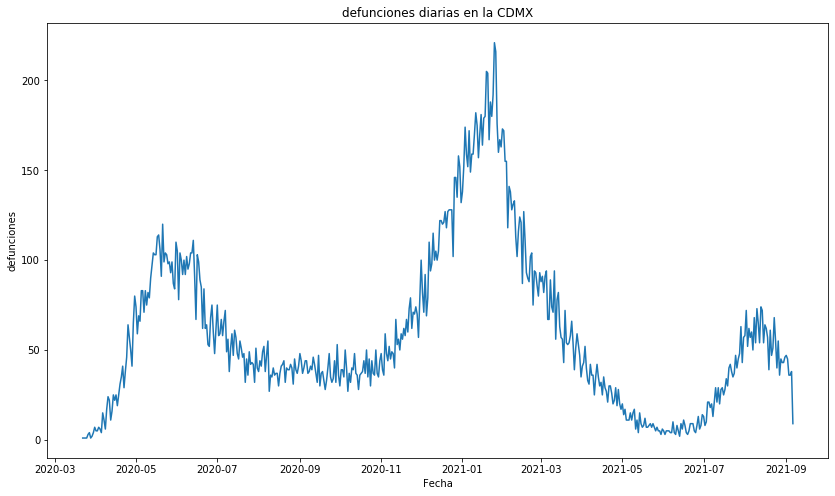

In [32]:
plt.figure(figsize=(14,8))
sns.lineplot(data=defunciones_diarias, x = "FECHA_DEF", y="DEF")
plt.xlabel("Fecha")
plt.ylabel("defunciones")
plt.title("defunciones diarias en la CDMX")
plt.show()

In [33]:
defunciones_diarias["DEF_ACUMULADAS"] = defunciones_diarias["DEF"].cumsum(axis=0)
defunciones_diarias.head()

,FECHA_DEF,DEF,DEF_ACUMULADAS
0,2020-03-22,1,1
1,2020-03-23,1,2
2,2020-03-25,1,3
3,2020-03-26,3,6
4,2020-03-27,4,10


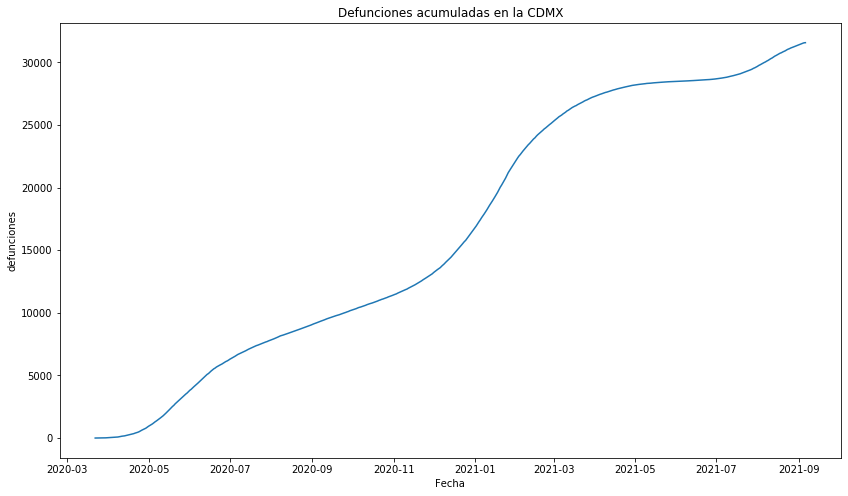

In [34]:
plt.figure(figsize=(14,8))
sns.lineplot(data=defunciones_diarias, x = "FECHA_DEF", y="DEF_ACUMULADAS")
plt.xlabel("Fecha")
plt.ylabel("defunciones")
plt.title("Defunciones acumuladas en la CDMX")
plt.show()

Ahora me interesa estudiar las curvas epidémicas anteriores, pero desagregadas por rango de edad.

In [35]:
def rango_edad(x):
    """
    Una función que divide en rangos de edad
    """
    if x <= 20:
        rango = "0-20"
    elif x<=40:
        rango = "21-40"
    elif x<= 60:
        rango = "41-60"
    else:
        rango = "60 - +"
    return rango

In [36]:
datos_covid["RANGO_EDAD"] = datos_covid["EDAD"].apply(rango_edad)

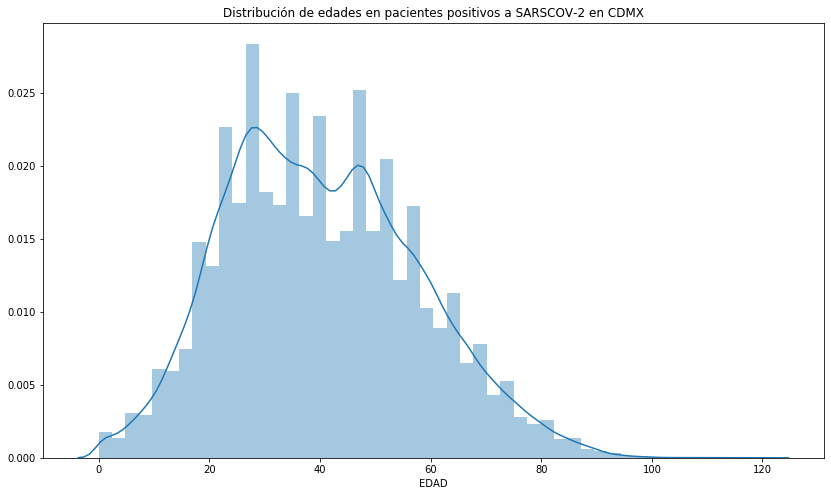

In [37]:
plt.figure(figsize=(14,8))
sns.distplot(datos_covid.EDAD)
plt.title("Distribución de edades en pacientes positivos a SARSCOV-2 en CDMX")
plt.show()

In [38]:
casos_rango_edad = datos_covid.groupby("RANGO_EDAD")["CLASIFICACION_FINAL"].agg("sum").to_frame()
casos_rango_edad.reset_index(inplace = True)

In [39]:
casos_rango_edad

,RANGO_EDAD,CLASIFICACION_FINAL
0,0-20,92005
1,21-40,312005
2,41-60,257485
3,60 - +,104108


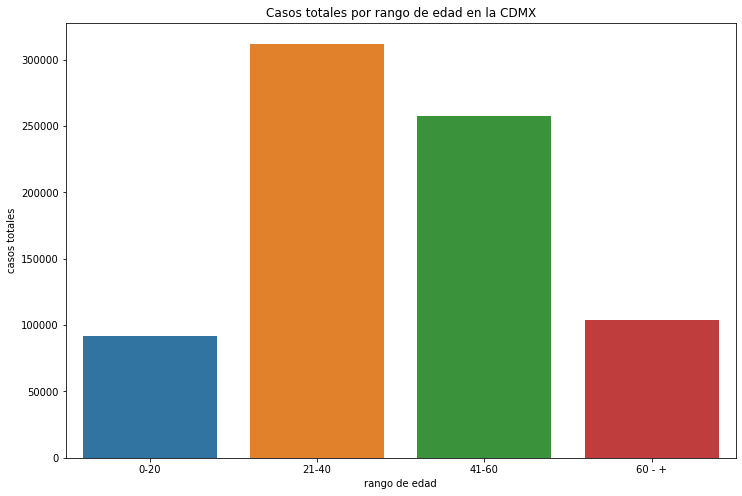

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(data=casos_rango_edad, x="RANGO_EDAD", y="CLASIFICACION_FINAL")
plt.xlabel("rango de edad")
plt.ylabel("casos totales")
plt.title("Casos totales por rango de edad en la CDMX")
plt.show()

In [41]:
casos_diarios_re = datos_covid.groupby(["FECHA_INGRESO", "RANGO_EDAD"])["CLASIFICACION_FINAL"].agg("sum").to_frame()
casos_diarios_re.reset_index(inplace=True)
casos_diarios_re.head()

,FECHA_INGRESO,RANGO_EDAD,CLASIFICACION_FINAL
0,2020-02-27,21-40,1
1,2020-02-27,41-60,1
2,2020-03-04,21-40,1
3,2020-03-05,41-60,1
4,2020-03-07,0-20,1


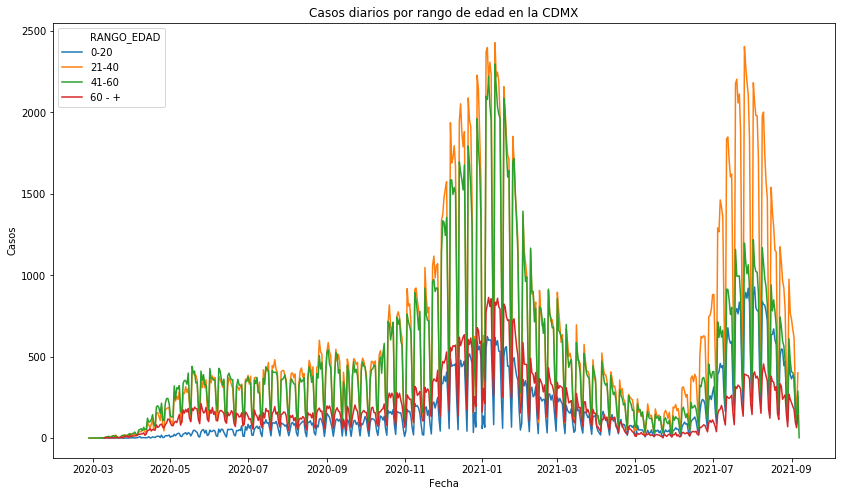

In [42]:
plt.figure(figsize=(14,8))
sns.lineplot(data=casos_diarios_re, x = "FECHA_INGRESO", y="CLASIFICACION_FINAL", 
             hue="RANGO_EDAD", hue_order=["0-20", "21-40", "41-60", "60 - +"])
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.title("Casos diarios por rango de edad en la CDMX")
plt.show()

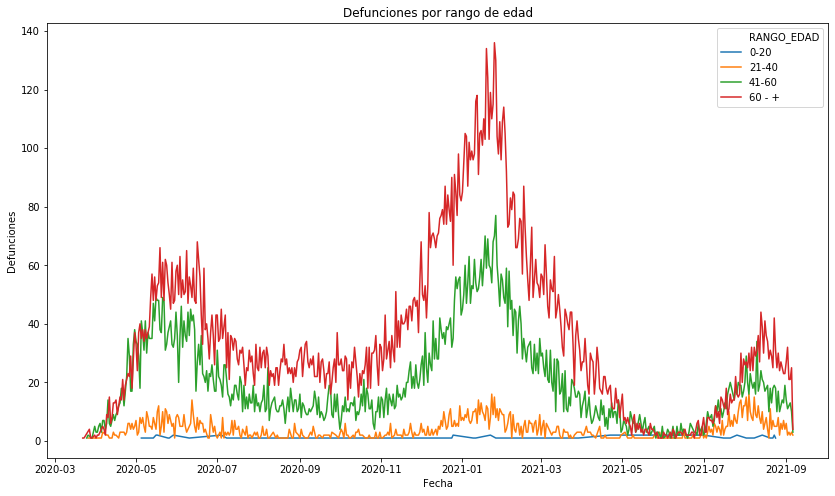

In [43]:
defunciones_diarias_re = datos_covid[datos_covid["DEF"]==1].groupby(["FECHA_DEF", "RANGO_EDAD"])["DEF"].agg("sum").to_frame()
defunciones_diarias_re.reset_index(inplace=True)
plt.figure(figsize=(14,8))
sns.lineplot(data=defunciones_diarias_re, x = "FECHA_DEF", y="DEF", 
             hue="RANGO_EDAD", hue_order=["0-20", "21-40", "41-60", "60 - +"])
plt.xlabel("Fecha")
plt.ylabel("Defunciones")
plt.title("Defunciones por rango de edad")
plt.show()

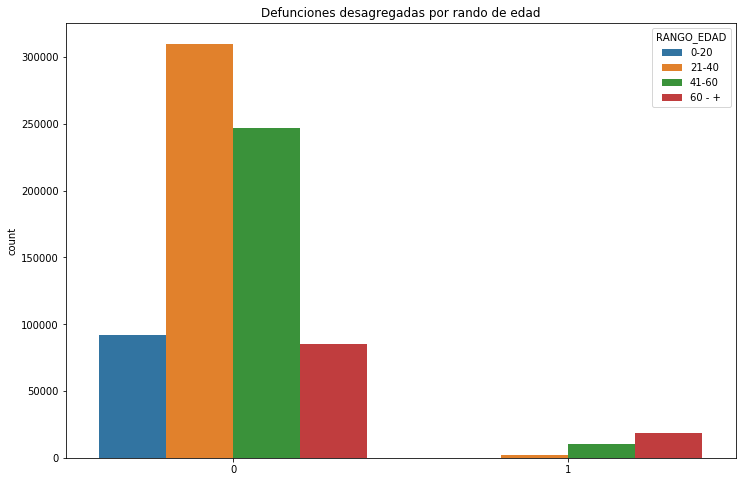

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(data=datos_covid, x="DEF", hue="RANGO_EDAD",
             hue_order=["0-20", "21-40", "41-60", "60 - +"])
plt.xlabel("")
plt.title("Defunciones desagregadas por rando de edad")
plt.show()